<a href="https://colab.research.google.com/github/GiselaCS/Mujeres_Digitales/blob/main/Estadistica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nominal: Consiste en clasificar objetos o fenómenos, según ciertas características, tipologías o nombres, dándoles una denominación o símbolo, sin que implique ninguna relación de orden, distancia o proporción entre los objetos o fenómeno.

Ejemplo Cuando un producto se rotula de acuerdo al cumplimiento de las especificaciones de diseño como "conforme y no conforme". o "crítico, grave, y menor". No se obtienen valores numéricos y no se puede realizar un orden de las observaciones con sentido.

Ordinal Llamada también escala de orden jerárquico, con ella se establecen posiciones relativas de los objetos o fenómenos en estudio, respecto a alguna característica de interés, sin que se reflejen distancias entre ellos. Puede suceder que los objetos de una categoría de las escala no sean precisamente diferentes a los objetos de otra categoría de la escala, sino que están relacionados entre si.

Ejemplo Suponga que a los clientes en un almacen se les hace unas preguntas para valorar la calidad del servicio. Los clientes valoran la calidad de acuerdo a las siguientes respuestas: 1 (excelente), 2 (bueno), 3 (regular), 3 (malo) 4 (pésimo).

Intervalo Representa un nivel de medición más preciso, matemáticamente hablando, que las anteriores; no solo se establece un orden en las posiciones relativas de los objetos o individuos, sino que se mide también la distancia entre los intervalos o las diferentes categorías o clases.

Ejemplo Suponga que se está interesado en la temperatura del fundido de acero. Se toman cuatro lecturas cada dos horas: 2050, 2100, 2150, 2200 y 2250 F. Obviamente los datos pueden ser ordenados (semejante a los datos ordinales) en orden ascendente de temperatura indicando temperatura más fria, menos fria, y asi sucesivamente.

Razon Cuando una escala tiene todas las características de una escala de intervalo y además un punto cero real en su origen, se llama escala de razón. Además de distinción, orden y distancia, ésta es una escala que permite establecer en que proporción es mayor una categoría de una escala que otra. El cero absoluto o natural representa la nulidad de lo que se estudia.

Ejemplo Suponga que el peso de cuatro piezas fundidas de metal son 2.0, 2.1, 2.3 y 2.5 kg. El orden(ordinal) y la diferencia (intervalo) en los pesos puede ser comparado. Así, el incremento de peso de 2.0 a 2.1 es de 0.1 kg, el cual es el mismo que el que existe entre 2.3 y 2.4 kg

# 1) Presentacion de datos


---


# a) Diagrama de Puntos

Es una gráfica muy útil para visualizar un conjunto pequeño de datos; por ejemplo, de unas 20 observaciones. La gráfica permite ver rápidamente la tendencia y variabilidad de los datos. Para su elaboración dibuje una línea horizantal demarcada con los valores encontrados en los datos, luego coloque tantos circulos pequeños rellenos (o esfera) encima uno de otro sobre el número del eje correspondiente al dato.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ratings = pd.read_csv('ratings.csv', encoding='iso8859')
ratings.head()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100050,5,2018-10-31,Look Who's Talking Too,https://www.imdb.com/title/tt0100050/,movie,4.6,81.0,1990,"Comedy, Family, Romance",41915.0,1990-12-14,Amy Heckerling
1,tt1000774,5,2018-09-24,Sex and the City,https://www.imdb.com/title/tt1000774/,movie,5.6,145.0,2008,"Comedy, Drama, Romance",110501.0,2008-05-12,Michael Patrick King
2,tt1001526,8,2018-09-25,Megamind,https://www.imdb.com/title/tt1001526/,movie,7.3,95.0,2010,"Animation, Action, Comedy, Family, Sci-Fi",208584.0,2010-10-28,Tom McGrath
3,tt0100157,7,2018-09-25,Misery,https://www.imdb.com/title/tt0100157/,movie,7.8,107.0,1990,"Drama, Thriller",165090.0,1990-11-29,Rob Reiner
4,tt0100263,7,2018-11-01,Nikita,https://www.imdb.com/title/tt0100263/,movie,7.3,117.0,1990,"Action, Thriller",62995.0,1990-02-21,Luc Besson


In [3]:
# Crear un loop para contar
movie_count = []

for index, year in enumerate(ratings['Year']):
  subset = ratings.iloc[:index+1]
  count = len(subset[subset['Year'] == year])   # Contar todas las peliculas para el mismo año en este subconjunto
  movie_count.append(count)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


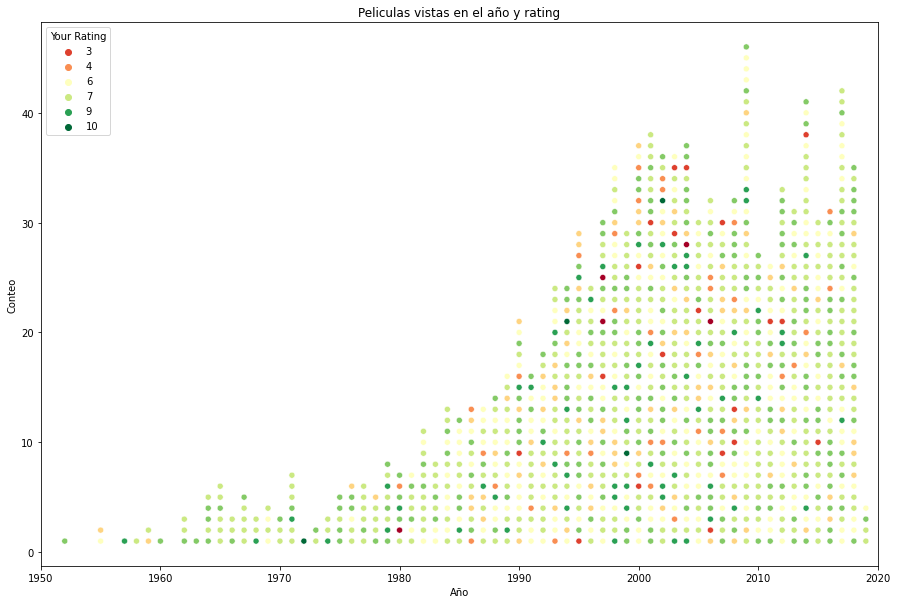

In [4]:
# Data para el plot 
x = ratings['Year']
y = movie_count
hue1 = ratings['Your Rating']

# Dot plot created using scatter plot
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x, y, hue=hue1, palette="RdYlGn")
plt.xlim([1950, 2020])
plt.ylabel("Conteo")
plt.xlabel("Año")
plt.title("Peliculas vistas en el año y rating")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


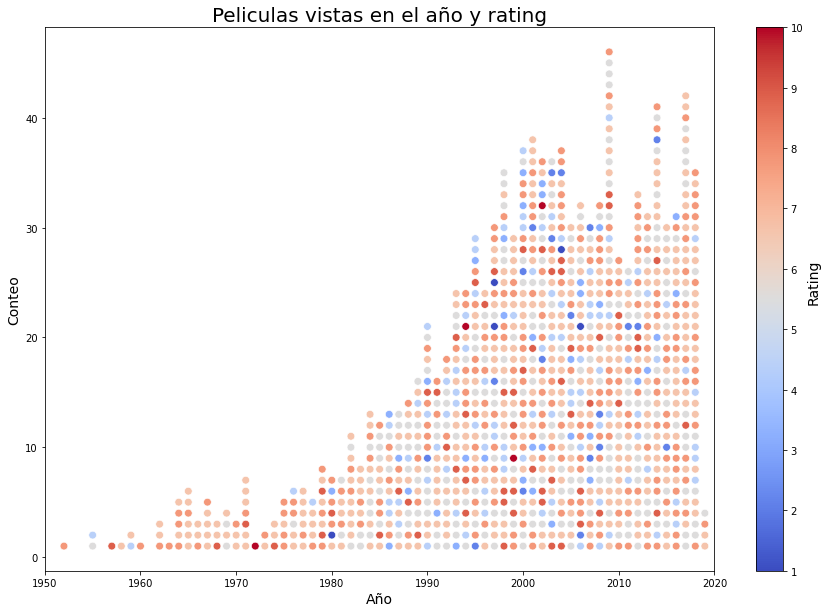

In [5]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x, y, hue=hue1, s=60, legend="full", palette="coolwarm")
ax.grid(False)  # Remover la grilla
ax.get_legend().remove()  # Borrar la leyenda
scale_legend = plt.Normalize(hue1.min() - 1, hue1.max())  # Crear la escala para el colormap.
# hue.min-1 porque no considero el 1/10
color_map = plt.cm.ScalarMappable(cmap="coolwarm", norm=scale_legend)  # Colormap 
color_map.set_array([])  # Dummy variable para crear el colormap.
ax.figure.colorbar(color_map)  # Agregar el colormap como leyenda.
plt.xlim([1950, 2020])  # Especificar limite de tiempo
plt.ylabel("Conteo", size=14)
plt.xlabel("Año", size=14)
plt.title("Peliculas vistas en el año y rating", size=20)
plt.gcf().text(0.83, 0.5, "Rating", fontsize=14, rotation=90)  # Label para el colormap.
plt.show()

In [8]:
df=pd.DataFrame()
df['x']=x;df['y']=y;df['hue']=hue1
df

,x,y,hue
0,1990,1,5
1,2008,1,5
2,2010,1,8
3,1990,2,7
4,1990,3,7
...,...,...,...
1100,1990,17,6
1101,1990,18,7
1102,1990,19,8
1103,1990,20,6


In [12]:
import plotly.express as px
df=pd.DataFrame()
df['x']=x;df['y']=y;df['hue']=hue1;
fig = px.scatter(df, x="x", y="y", color="hue",
                 title="Peliculas por rating y año",labels={
                     "x": "Año",
                     "y": "Conteo",
                     "hue": "Rating"
                 }
                )
fig.show()

###################################
fig.update_layout(
    title="Peliculas por rating y año",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

# Diagrama de tallos y hojas
---
Dado un conjunto de datos formado por n observaciones, las cuales pueden ser representadas mediante  x1,x2,…,xn  y donde cada  xi,(i=1,…,n)  tiene por lo menos dos dígitos. Una forma rápida de obtener una representación visual del conjunto de datos es construir un diagrama de tallos y hojas. Este diagrama es usado cuando hay un número no muy pequeño de datos. Los siguientes son los pasos para construir un diagrama de tallos y hojas:

1. Seleccionar uno o más dígitos iniciales para los valores de tallo. El dígito(s) final(es) se convierte (n) en hojas. Para facilitar la determinación de la forma de la distribución de los datos se necesitan al menos 5 tallos.
2. Hacer una lista de valores de tallo en una columna vertical.
3. Registrar las hojas por cada observación junto al valor correspondiente del tallo.
4. Indicar las unidades para tallos y hojas en algún lugar del diagrama.


Los diagramas de tallos y hojas nos dan una idea de la localización de los datos y de la forma de la distribución. Esta técnica funciona bien para los conjuntos de datos que no tienen una dispersión muy grande.


In [13]:
pip install stemgraphic

     |████████████████████████████████| 61 kB 425 kB/s 


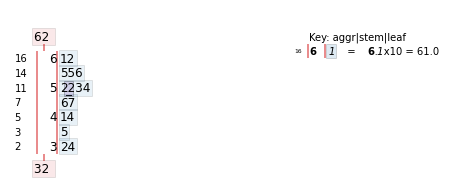

In [14]:
x = [32, 34, 35, 41, 44, 46, 47, 52, 52, 53,54,55,55, 56, 61, 62]
import stemgraphic
fig, ax = stemgraphic.stem_graphic(x)

# Histograma
--- 
El histograma es una técnica gráfica utilizada para presentar gran cantidad de datos. Se le atribuye a Karl Pearson en 1895. El histograma puede ser: de frecuencias absolutas, de frecuencias relativas, de frecuencias absolutas acumuladas y de frecuencias relativas acumuladas. Para la construcción del histograma se requiere elaborar una tabla de distribución de frecuencias, lo cual se desarrollará a continuación.

El gráfico de la distribución de frecuencias, se llama histograma. El histograma de frecuencias es una representación visual de los datos en donde se evidencian fundamentalmente tres características: forma, acumulación o tendencia posicional y dispersión o variabilidad.

El histograma (de frecuencias) en si es una sucesión de rectángulos construidos sobre un sistema de coordenadas de la siguiente manera:

1. Las bases de los rectángulos se localizan en el eje horizontal. La longitud de la base es igual al ancho del intervalo.
2. Las alturas de los rectángulos se registran sobre el eje vertical y corresponden a las frecuencias de los intervalos.
3. Las áreas de los rectángulos son proporcionales a las frecuencias de las clases.

k=1+3.3log10(n)

In [15]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



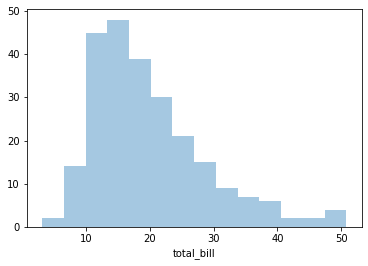

In [16]:
sns.distplot(tips['total_bill'], kde=False) 
plt.show()

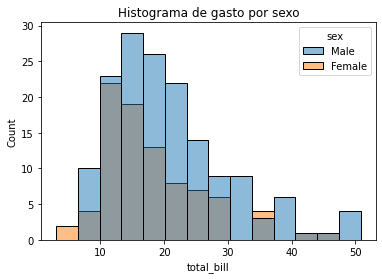

In [17]:
sns.histplot(data=tips,x='total_bill',hue='sex') 
plt.title('Histograma de gasto por sexo')
plt.show()

In [18]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", nbins=10)
fig.update_layout(
    title="Comportamiento de total_bill",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

# Series de tiempo (Lineplot)

In [20]:
df=pd.read_csv('accidents.csv',delimiter=";")
type(df)

pandas.core.frame.DataFrame

In [21]:
print(df.shape)
df.head()

(18501, 24)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,3988123.0,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,3987962.0,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,4193132.0,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0.0,0.0,1.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962.0,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0.0,0.0,0.0,0.0,1.0,0.0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111.0,Sedan,Sedan,NaN,NaN,NaN


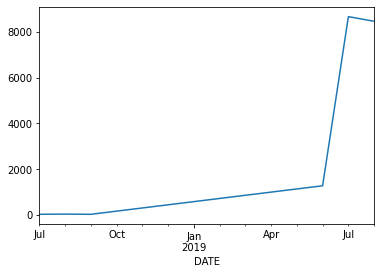

In [22]:
df['DATE']=pd.to_datetime(df['DATE'])
monthly_accidents =df.groupby(df['DATE'].dt.to_period('M')).size()
monthly_accidents.plot.line()

# Facetgrid

In [25]:
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-09-26,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,3988123.0,Sedan,NaN,NaN,NaN,NaN
1,2018-09-25,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,3987962.0,Sedan,NaN,NaN,NaN,NaN
2,2019-08-22,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,4193132.0,Sedan,NaN,NaN,NaN,NaN
3,2018-09-23,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0.0,0.0,1.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962.0,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-20,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0.0,0.0,0.0,0.0,1.0,0.0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111.0,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2019-06-20,17:20,BROOKLYN,11203.0,40.659023,-73.931180,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4155756.0,Sedan,NaN,NaN,NaN,NaN
18497,2019-06-16,15:30,QUEENS,11434.0,40.691650,-73.779205,MERRICK BOULEVARD,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,4152498.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
18498,2019-06-03,7:38,BRONX,10467.0,40.877876,-73.865960,WHITE PLAINS ROAD,0.0,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4145609.0,Sedan,Bus,NaN,NaN,NaN
18499,2019-07-06,2:42,MANHATTAN,10019.0,40.764840,-73.980540,WEST 56 STREET,0.0,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Other Vehicular,NaN,NaN,NaN,4166324.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
